In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [2]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable
df=pd.read_csv('german_credit.csv')
df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [3]:
# dimension of data frame
df.shape

(1000, 21)

In [4]:
# Lets build a Ensemble model but need to modify the dataset first
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [6]:
# Print Shape of model data
# Seperate categorical data to get dummies
cat_df = df.select_dtypes(include=['object']).copy()
cat_df.shape

(1000, 13)

In [7]:
cat_df=pd.get_dummies(cat_df.iloc[:,:])
cat_df.head()

,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,credit_history_all credits at this bank paid back duly,credit_history_critical account/ other credits existing (not at this bank),credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/ all credits paid back duly,purpose_(vacation - does not exist?),...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
2,0,0,0,1,0,1,0,0,0,1,...,1,0,0,0,0,1,1,0,0,1
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [8]:
# complete model data by converting non-numeric to dummy
crd_df=pd.get_dummies(df)
print ("Shape of the data Frame after get_dummies",crd_df.shape)
crd_df.head()

Shape of the data Frame after get_dummies (1000, 62)


,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,1,0,0,0,0,1,1,0,0,1
3,0,42,7882,2,4,45,1,2,0,1,...,0,0,0,1,0,0,1,0,0,1
4,1,24,4870,3,4,53,2,2,0,1,...,0,0,0,1,0,0,1,0,0,1


### Check for highly correlated variables but don't required any treatment for this use case

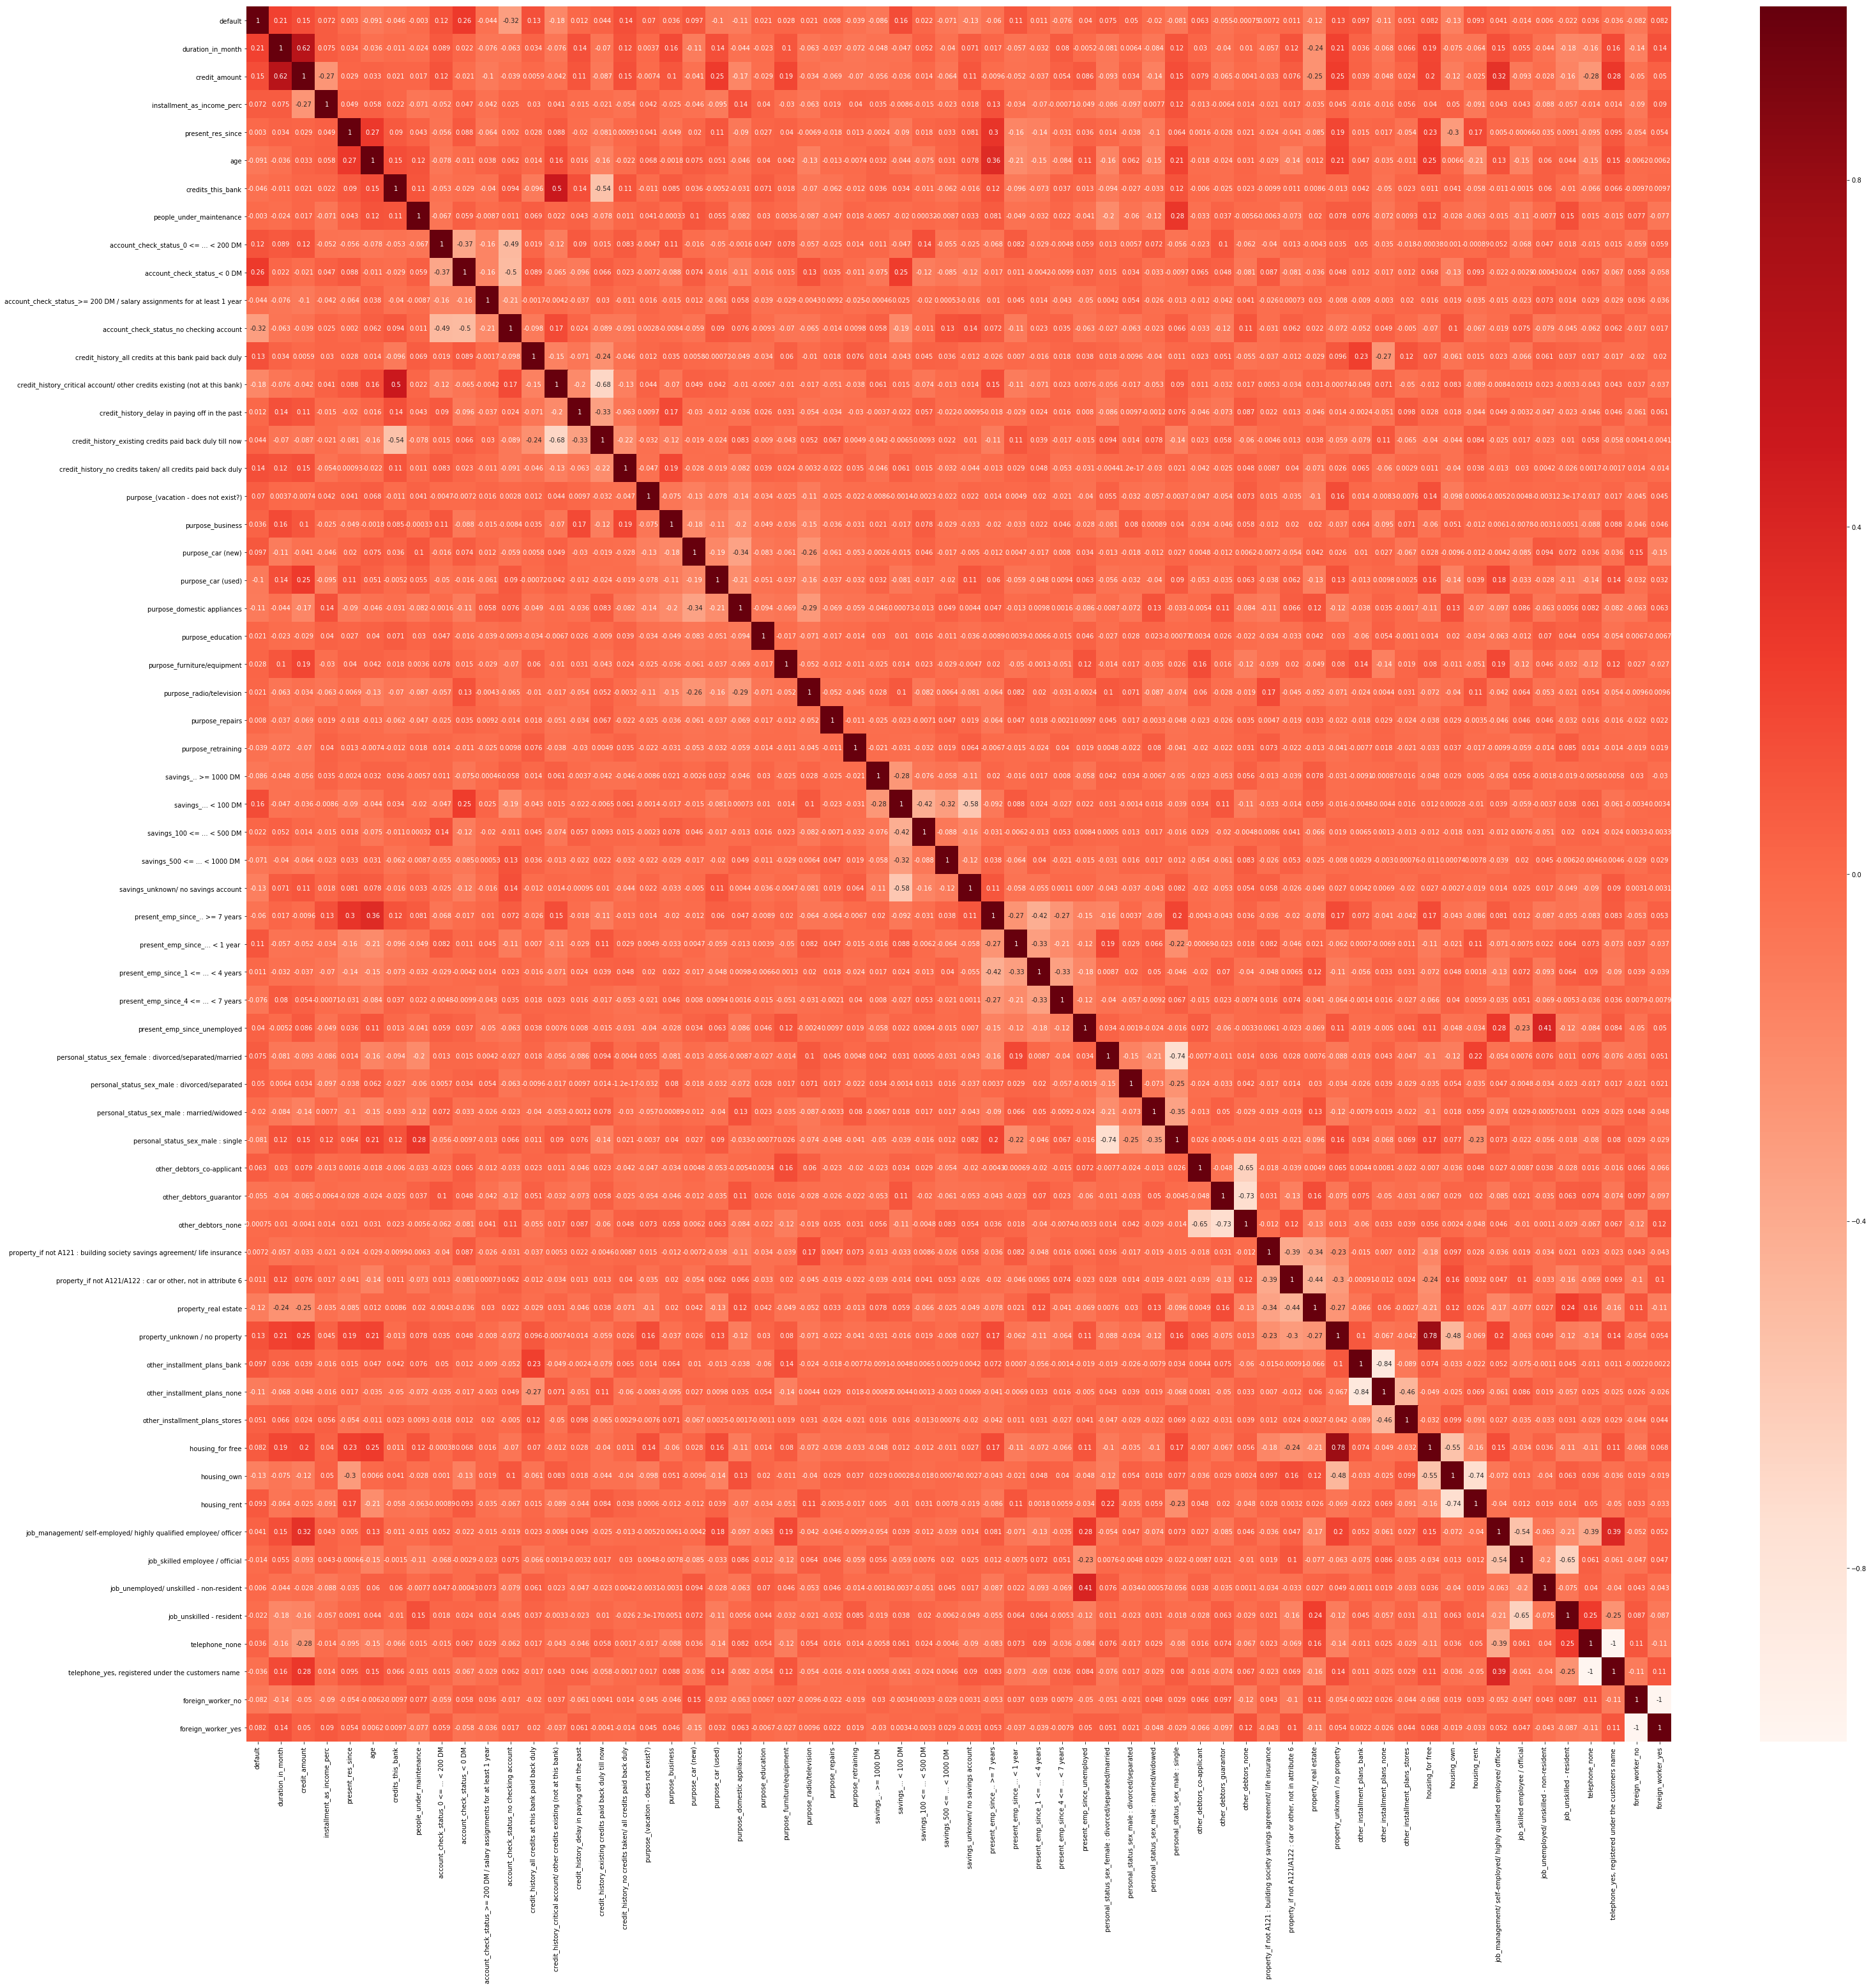

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
cor = crd_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Drop the original variables which are converted to dummy

In [10]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
0,0,6,1169,4,4,67,2,1,1,0,...,0,1,0,1,0,1,0,0,1,1
1,1,48,5951,2,2,22,1,1,0,0,...,0,1,0,1,0,1,0,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,0,1,0,1,0,0,0,1,0,1
3,0,42,7882,2,4,45,1,2,1,0,...,0,1,0,0,0,1,0,0,0,1
4,1,24,4870,3,4,53,2,2,1,0,...,1,1,0,0,0,1,0,0,0,1


In [11]:
df_=df['default']

##### Scaling and normalizing of numerical column is required, to standardize the data, before we model a data.

In [12]:
# Step 1: Seperate numerical and categorical coulmns
# Collecting numerical data
num_df=df.select_dtypes(include=['int64']).copy()
num_df.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
0,0,6,1169,4,4,67,2,1
1,1,48,5951,2,2,22,1,1
2,0,12,2096,2,3,49,1,2
3,0,42,7882,2,4,45,1,2
4,1,24,4870,3,4,53,2,2


In [13]:
# step 2: drop default as it is dependent variable
num_df=num_df.drop('default',axis=1)
num_df.head()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
0,6,1169,4,4,67,2,1
1,48,5951,2,2,22,1,1
2,12,2096,2,3,49,1,2
3,42,7882,2,4,45,1,2
4,24,4870,3,4,53,2,2


In [14]:
# step 3: create a StandardScaler processing object
from sklearn import preprocessing 
Std_scaler = preprocessing.StandardScaler()
scaled_array = Std_scaler.fit_transform(num_df)

In [15]:
# Step 4: convert the scaled array to dataframe
 
df_normalized = pd.DataFrame(scaled_array,columns= ['duration_in_month','credit_amount','installment_as_income_perc','present_res_since','age','credits_this_bank','people_under_maintenance'])
df_normalized.head()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869


In [16]:
# step 5: Joining Numerical and Categorical data
df_new=  df_normalized.join(cat_df)
df_new= df_new.join(df_)
df_new.head()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes,default
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,0,1,0,...,0,0,1,0,0,0,1,0,1,0
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,1,0,0,...,0,0,1,0,0,1,0,0,1,1
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,0,0,0,...,0,0,0,0,1,1,0,0,1,0
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,0,1,0,...,0,0,1,0,0,1,0,0,1,0
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,0,1,0,...,0,0,1,0,0,1,0,0,1,1


### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [17]:
X = df_new.drop('default', axis = 1)
y = df_new['default']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)
print ("X_train shape ", X_train.shape)
print ("y_train shape ", y_train.shape)
print ("X_test shape ", X_test.shape)
print ("y_test shape ", y_test.shape)

X_train shape  (700, 61)
y_train shape  (700,)
X_test shape  (300, 61)
y_test shape  (300,)


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [19]:
from sklearn.ensemble import RandomForestClassifier
regr = RandomForestClassifier(n_jobs=2, criterion="entropy",random_state=9999,n_estimators=500)
regr = regr.fit(X_train, y_train)
predicted = regr.predict(X_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
score_train = regr.score(X_train, y_train)
print("Training Accuracy",score_train)
score_test = regr.score(X_test, y_test)
print("Testing Accuracy",score_test)
print ("Accuracy_score for tseting set  ",accuracy_score(y_test,predicted))
print("The confussion matrix for random forest is as")
print (confusion_matrix(y_test,predicted))


Training Accuracy 1.0
Testing Accuracy 0.7833333333333333
Accuracy_score for tseting set   0.7833333333333333
The confussion matrix for random forest is as
[[198  10]
 [ 55  37]]


### Model using unscaled data

In [21]:
from sklearn.model_selection import train_test_split
X1 = crd_df.drop('default',axis=1)
y1 = crd_df['default']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=15)

from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier( n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rfcl = rfcl.fit(X1_train, y1_train)
predictions1 = rfcl.predict(X1_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print("The confussion matrix for random forest is as")
print (confusion_matrix(y1_test,predictions1))

print ("Accuracy for training set  using scaled numerical ",rfcl.score(X1_train, y1_train))

print ("Accuracy for tseting set  using scaled numerical ",rfcl.score(X1_test, y1_test))

print ("Accuracy_score for tseting set  using scaled numerical ",accuracy_score(y1_test,predictions1))

The confussion matrix for random forest is as
[[198  10]
 [ 55  37]]
Accuracy for training set  using scaled numerical  1.0
Accuracy for tseting set  using scaled numerical  0.7833333333333333
Accuracy_score for tseting set  using scaled numerical  0.7833333333333333


- ###### For unscaled  scaled data. we proceed with scaled data.

### Q6 Show the list of the features importance( 1 Marks)

In [22]:
feature_importances = pd.DataFrame(regr.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
credit_amount,0.098471
age,0.079274
duration_in_month,0.072932
account_check_status_no checking account,0.054480
installment_as_income_perc,0.037452
present_res_since,0.035320
account_check_status_< 0 DM,0.032858
savings_... < 100 DM,0.020686
credit_history_critical account/ other credits existing (not at this bank),0.020360
purpose_car (new),0.019353


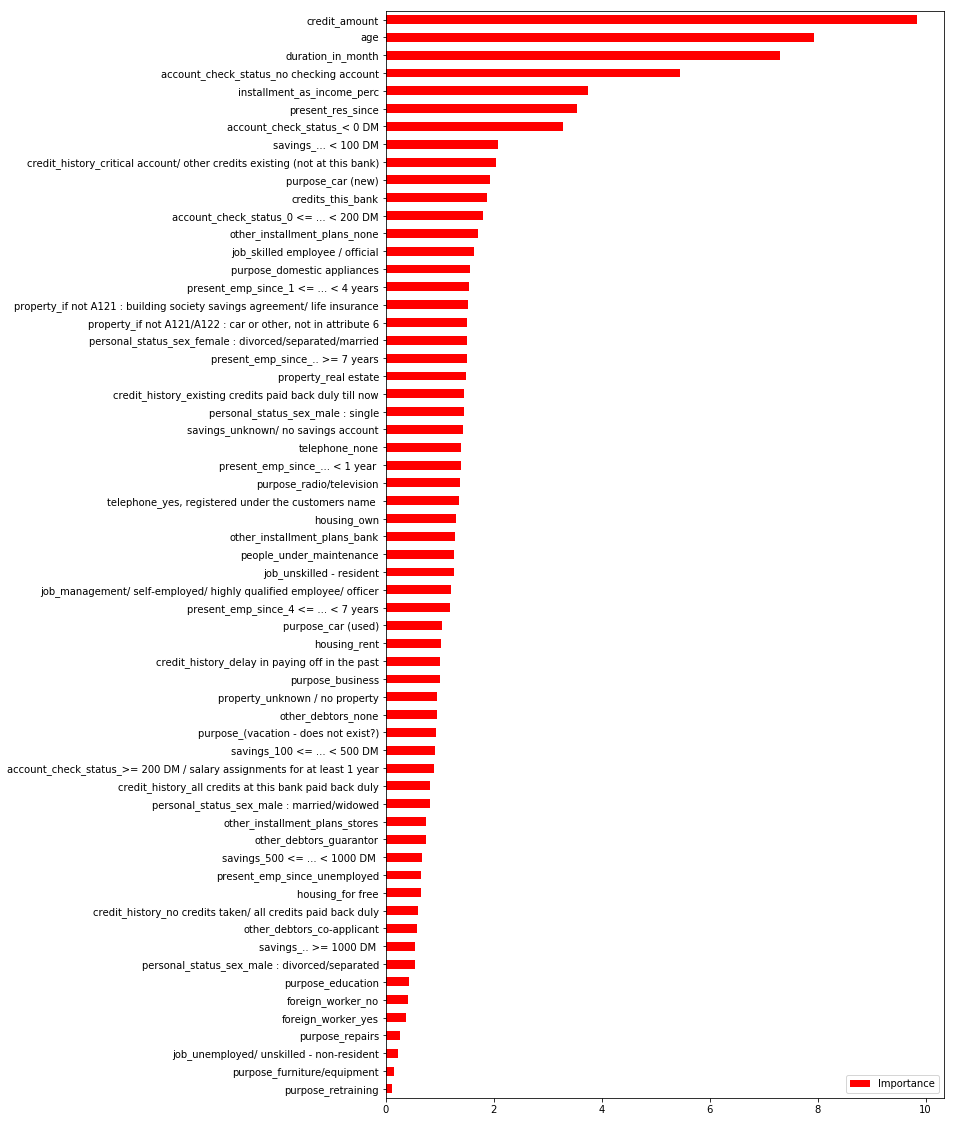

In [23]:
Importance = pd.DataFrame({'Importance':regr.feature_importances_*100}, index=X_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r',figsize=(10, 20) )

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [25]:
# Use below values
num_folds = 10
seed = 77

In [26]:
#Validate the Random Forest model build above using k fold
myList =  list(range(10,20))
cv_scores = []
max_depth = []
for k in myList:
    dt = RandomForestClassifier(max_depth=k,random_state=seed)
    scores = cross_val_score(dt, X_train, y_train, cv=num_folds, scoring='accuracy',)
    cv_scores.append(scores.mean())
    max_depth.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of max_depth is %d" % best_k)

The optimal number of max_depth is 13


In [27]:
#Calculate Mean score
print(scores.mean())

0.7328355641092934


In [29]:
# Calculate score standard deviation using std()
print(scores.std())

0.036151173172429926


# Q8 Print the confusion matrix( 1 Marks)

In [30]:
from sklearn.metrics import confusion_matrix
final = RandomForestClassifier(max_depth=14, n_jobs=2,n_estimators=500,criterion="entropy",random_state=77,min_samples_leaf = 1)
final.fit(X_train,y_train)
predicted = final.predict(X_test)
print (confusion_matrix(y_test,predicted))
#final.scores(X_test,y_test)
print ('score of model with max_depth = 1 is :    ',final.score(X_test, y_test))

[[196  12]
 [ 58  34]]
score of model with max_depth = 1 is :     0.7666666666666667


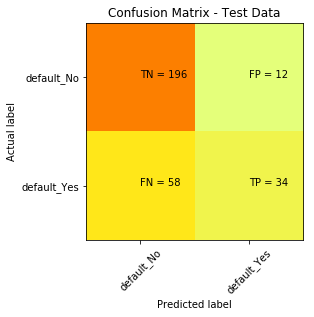

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,predicted )
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['default_No','default_Yes']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [32]:
TP = 34
TN = 196
FP = 12
FN = 58

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

#### Classification Accuracy: Overall, how often is the classifier correct(percentage of correct predictions)

In [33]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test,predicted ))

0.7666666666666667
0.7666666666666667


##### Sensitivity: When the actual value is positive, how often is the prediction correct?
- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"

In [34]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, predicted))

0.3695652173913043
0.3695652173913043


##### Precision: When a positive value is predicted, how often is the prediction correct?
- How "precise" is the classifier when predicting positive instances?

In [35]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, predicted))

0.7391304347826086
0.7391304347826086


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [36]:
#Hint: Use roc_curve
y_pred_prob = regr.predict_proba(X_test)[:, 1]

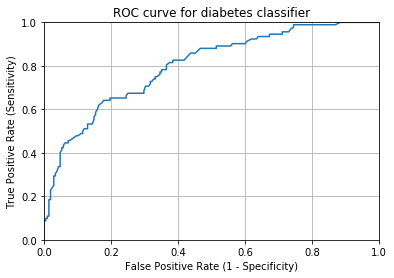

In [37]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [38]:
from sklearn import metrics
metrics.auc(fpr, tpr)

0.7995401337792641

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [39]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [40]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    regr.fit(X_, y_)
    y_pred = regr.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [41]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7633333333333333
Standard deviation:  0.011450376024878434
